In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 7.8 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import AutoTokenizer, TFAutoModel, TFAutoModelForMaskedLM

Step 1: Data Collection

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Deep UV hardening of photoresist for shaping o...,The development of microfabrication techniques...,"[CHEM, MATE]","[Graphene, Immunosensor, Ion-milling shaping a...","[1600, 2500]",[The unique chemical and physical properties o...,[]
1,A Restricted Repertoire of de Novo Mutations i...,Gillespie syndrome (GS) is characterized by bi...,"[BIOC, MEDI]","[ACTA2, ITPR1, aniridia, calcium, cerebellar a...","[1311, 2716]","[Ida Mann, in her classic 1925 paper on the de...",[]
2,The Future of Nuclear Energy Relies on Integra...,,"[CENG, COMP, ENER, ENGI, ENVI, MATE]",[],"[1500, 1700, 2102, 2200, 2305, 2501]",[How can safety be guaranteed in nuclear facil...,[]
3,Simulations employing finite element method at...,Simulated curves compared to recorded data hav...,[CHEM],[],"[1602, 1603]",[Finite element method (FEM) simulation softwa...,[FEM simulations of soft interfaces integral f...
4,Cutting the lawn − Natural burial and its cont...,This article investigates the impact of natura...,"[AGRI, ENVI]","[Ecosystem services, Identity, Lawn cemetery, ...","[1107, 1111, 2303]",[The natural burial movement began in 1993 in ...,[]


In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(32072, 7)
(4009, 7)
(4008, 7)


Verify the class labels to check if the imbalance reduced

In [ ]:
label_counts = pd.Series([label for sublist in train_df['subjareas'] for label in sublist]).value_counts()
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Subject Area', 'Frequency']

fig = px.bar(label_counts_df, x='Subject Area', y='Frequency', title='Frequency of Each Subject Area Label')
fig.show()


Step 2: Data Pre-processing

In [ ]:
def prepare_elsevier_data(train_df, val_df, test_df):
    """
    Prepares the Elsevier corpus splits for multi-label classification without splitting.

    Args:
    - train_df: DataFrame containing the training dataset with columns 'abstract' and 'subjareas'.
    - val_df: DataFrame containing the validation dataset with columns 'abstract' and 'subjareas'.
    - test_df: DataFrame containing the test dataset with columns 'abstract' and 'subjareas'.

    Returns:
    - train_texts, val_texts, test_texts: Lists containing texts for training, validation, and testing.
    - train_labels, val_labels, test_labels: Arrays containing encoded labels for training, validation, and testing.
    - target_names: List of unique labels (subject areas).
    """
    mlb = MultiLabelBinarizer()

    all_labels = pd.concat([train_df['subjareas'], val_df['subjareas'], test_df['subjareas']])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df['subjareas'])
    val_labels = mlb.transform(val_df['subjareas'])
    test_labels = mlb.transform(test_df['subjareas'])

    train_texts = train_df['abstract'].tolist()
    val_texts = val_df['abstract'].tolist()
    test_texts = test_df['abstract'].tolist()

    return train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, mlb.classes_

train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)

In [ ]:
print(train_labels[:2])
print(train_texts[:2])
print(len(target_names))

[[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
['The development of microfabrication techniques compatible with scalable production processes of semiconductor industry is of crucial importance for the technological exploitation of graphene. We report here a novel technique for the photolithographic fabrication of back-gated field-effect transistor immunosensors using chemical vapor deposited (CVD) graphene. The CVD graphene was transferred following polymer assisted method and shaped by ion-milling rather than conventional oxygen plasma etching. A deep UV hardening technique was applied, respectively, before the ion milling shaping of graphene channels and before the deposition of Cr/Au layers for the lift-off fabrication of FET electrodes to ensure the removability of the photoresist. The quality of resulting graphene FET was confirmed by Raman spectroscopy, optical spectroscopy and the detection towards an ultralow concentration of human chorionic gona

In [ ]:
print(len(train_texts))
print(len(val_texts))

32072
4009


In [ ]:
# Convert validation labels to a NumPy array
npvalid_labels = np.asarray(val_labels)
nptrain_labels = np.asarray(train_labels)
nptest_labels = np.asarray(test_labels)

step 3: Classification with fine tuned BERT Model

In [ ]:
model_checkpoint = 'allenai/scibert_scivocab_cased'

scibert_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

scibert_model = TFAutoModel.from_pretrained(model_checkpoint, from_pt=True)

scibert_mlm = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint, from_pt=True)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

step 3: Set maximum dimension length based on the data

In [ ]:
max_length = 300

Step 4: Apply tokenization process to  Elsevier corpus. Tokenization converts your text data into a format that the BERT model can understand and process. It involves splitting the text into tokens (words or subwords), truncating sequences to the maximum length (max_length), and padding shorter sequences with zeros.

In [ ]:
train_encodings = scibert_tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
valid_encodings = scibert_tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
test_encodings = scibert_tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')

Step 4: Create a multiclass BERT model

multi-label binarization to convert the subject area labels into a binary format, where each label is represented by a 0 (absence) or 1 (presence).

BERT Model Configuration: A pre-trained BERT model (bert-base-cased) was chosen as the base for feature extraction. On top of it, a custom model was built for classification.

Custom Model: Added dense layers on top of BERT's pooled output, including a final dense layer with a sigmoid activation function to handle multi-label classification.

Loss Function: Used BinaryCrossentropy to treat each output label as an independent binary classification problem.
Optimizer: An Adam optimizer with a learning rate of 0.00005 was configured.


The call method implements the Label Attention Mechanism (LAM) which enhances BERT embeddings for multi-label classification. It first normalizes the word and label embeddings to calculate their cosine similarity, indicating compatibility. Next, it determines the most relevant words for each label using max pooling, and then applies softmax to these values to obtain attention scores. Finally, it computes a weighted sum of the BERT word embeddings based on these attention scores, summing over the sequence to produce a focused representation for each label.

In [ ]:
from tensorflow.keras.layers import Layer, Softmax

class LabelAttentionLayer(Layer):
    def __init__(self, num_labels, embedding_dim, **kwargs):
        super(LabelAttentionLayer, self).__init__(**kwargs)
        self.num_labels = num_labels
        self.embedding_dim = embedding_dim

    def build(self, input_shape):
        self.label_embeddings = self.add_weight(shape=(self.num_labels, self.embedding_dim),
                                                initializer="glorot_uniform",
                                                name="label_embeddings")

    def call(self, inputs):
        # Cosine similarity between word embeddings and label embeddings
        word_embeddings_norm = tf.nn.l2_normalize(inputs, axis=-1)
        label_embeddings_norm = tf.nn.l2_normalize(self.label_embeddings, axis=-1)
        cosine_similarity = tf.matmul(word_embeddings_norm, label_embeddings_norm, transpose_b=True)

        # Max pooling and softmax for attention scores
        max_similarity = tf.reduce_max(cosine_similarity, axis=2)
        attention_scores = Softmax(axis=-1)(max_similarity)

        # Apply attention scores to word embeddings
        attention_scores_expanded = tf.expand_dims(attention_scores, axis=-1)
        weighted_sum = tf.reduce_sum(inputs * attention_scores_expanded, axis=1)
        return weighted_sum


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model


def create_scibert_multilabel_model(pretrained_model_name_or_path='allenai/scibert_scivocab_cased', num_classes=18, max_length=300, hidden_size=1024, dropout=0.1, learning_rate=0.00005,from_pt=True):
    tf.keras.backend.clear_session()

    pretrained_LLM = TFAutoModel.from_pretrained(pretrained_model_name_or_path, from_pt=from_pt)
    pretrained_LLM.trainable = True

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')


    llm_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

    llm_out = pretrained_LLM(llm_inputs)
    output_token = llm_out.last_hidden_state


    label_attention_output = LabelAttentionLayer(num_labels=num_classes, embedding_dim=768)(output_token)

    hidden = Dense(hidden_size, activation='relu')(label_attention_output)
    hidden = Dropout(dropout)(hidden)

    output = Dense(num_classes, activation='sigmoid')(hidden)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
scibert_model = create_scibert_multilabel_model(pretrained_model_name_or_path=model_checkpoint,
                                                num_classes=num_subject_areas,
                                                max_length=max_length)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
scibert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, 300)]                0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, 300)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1099384   ['attention_mask[0][0]',      
 )                           ngAndCrossAttentions(last_   32         'input_ids[0][0]']           
                             hidden_state=(None, 300, 7                                       

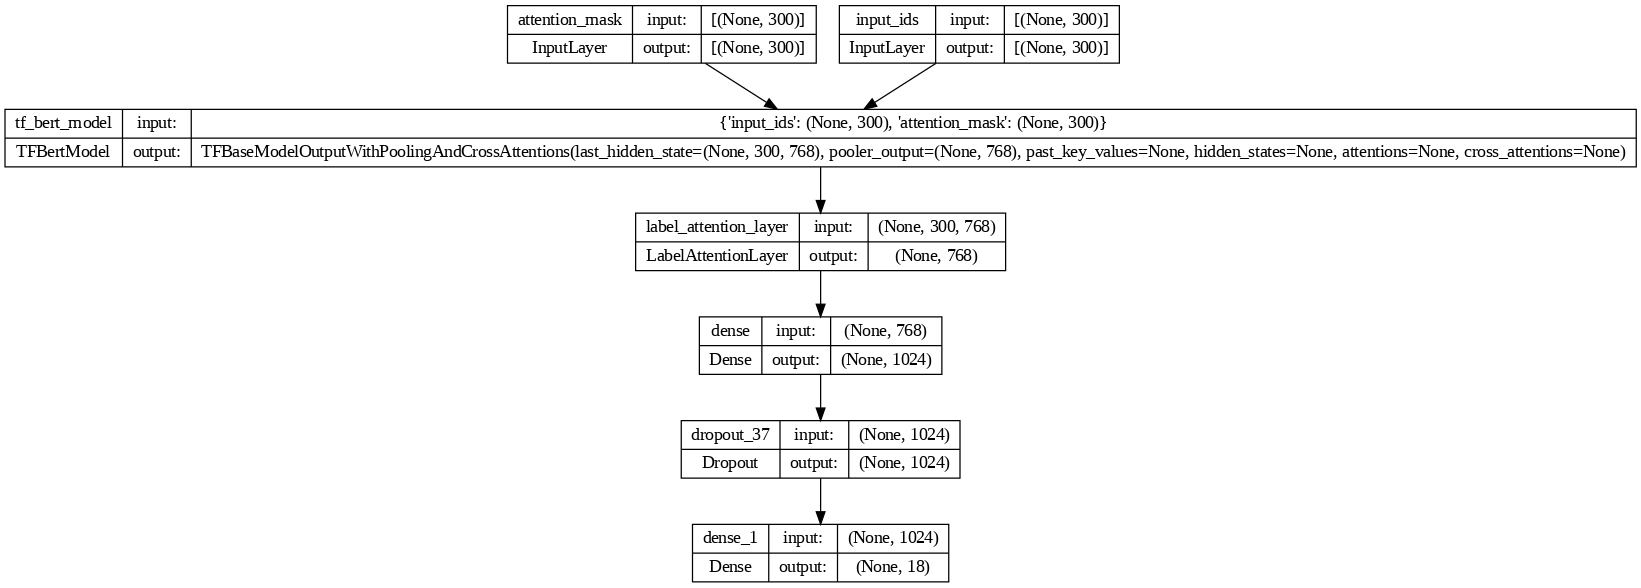

In [ ]:
keras.utils.plot_model(scibert_model, show_shapes=True, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
#It takes 10 to 14 minutes to complete an epoch when using a GPU
model_history = scibert_model.fit([train_encodings.input_ids, train_encodings.attention_mask],
          train_labels,
          validation_data=([valid_encodings.input_ids, valid_encodings.attention_mask],
                           val_labels),
          batch_size=8,
          epochs=2)

Epoch 1/2


4009/4009 [==============================] - 2330s 565ms/step - loss: 0.1586 - accuracy: 0.5240 - val_loss: 0.1382 - val_accuracy: 0.5565
Epoch 2/2
4009/4009 [==============================] - 2264s 565ms/step - loss: 0.1262 - accuracy: 0.5910 - val_loss: 0.1393 - val_accuracy: 0.5650


Validation Data Set Evaluation

In [ ]:
val_score = scibert_model.evaluate([valid_encodings.input_ids, valid_encodings.attention_mask],
                                                  val_labels)

print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

126/126 [==============================] - 83s 660ms/step - loss: 0.1393 - accuracy: 0.5650
Val loss: 0.13928978145122528
Val accuracy: 0.5649787783622742


In [ ]:
val_predictions = scibert_model.predict([valid_encodings.input_ids,  valid_encodings.attention_mask])

126/126 [==============================] - 88s 670ms/step


126/126 [==============================] - 85s 677ms/step
              precision    recall  f1-score   support

        AGRI       0.69      0.76      0.73       434
        BIOC       0.71      0.62      0.67       672
        CENG       0.62      0.13      0.21       180
        CHEM       0.72      0.17      0.27       255
        COMP       0.64      0.36      0.46       162
        EART       0.52      0.88      0.65       216
        ENER       0.62      0.73      0.67       241
        ENGI       0.61      0.64      0.63       456
        ENVI       0.69      0.61      0.64       524
        IMMU       0.76      0.50      0.60       252
        MATE       0.75      0.67      0.70       345
        MEDI       0.82      0.76      0.79       829
        MULT       0.87      0.69      0.77       414
        NEUR       0.77      0.81      0.79       350
        PHAR       0.71      0.52      0.60       251
        PHYS       0.61      0.46      0.52       249
        PSYC       0.39

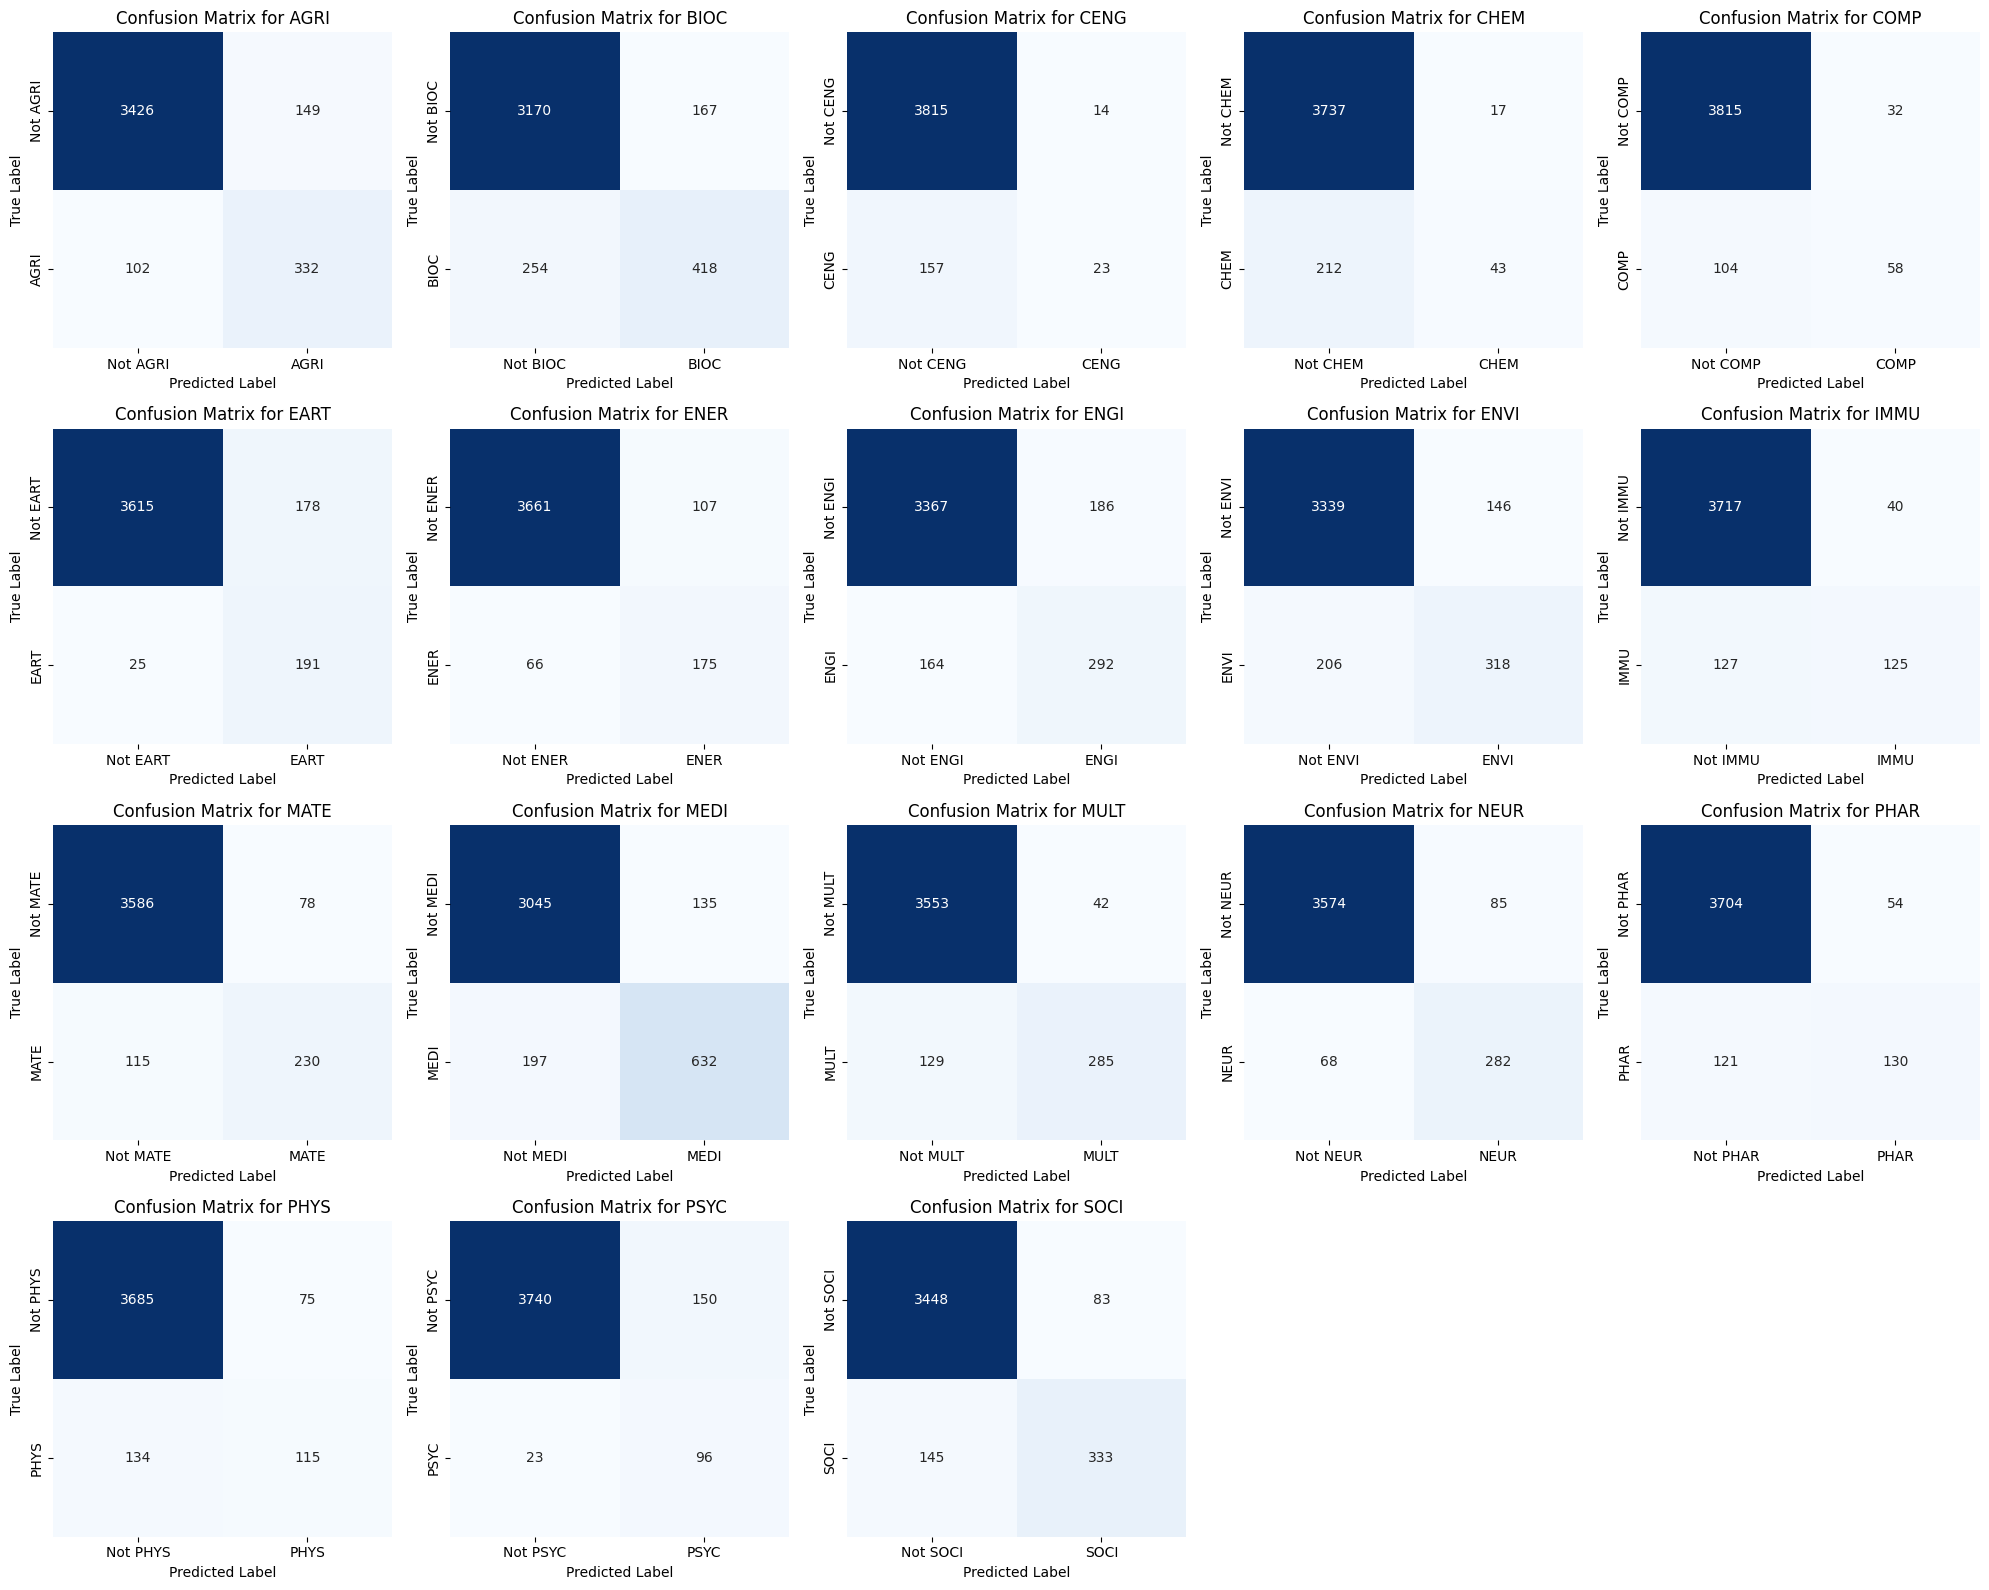

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(scibert_model,
             [valid_encodings.input_ids,  valid_encodings.attention_mask],
             val_labels,
             target_names)


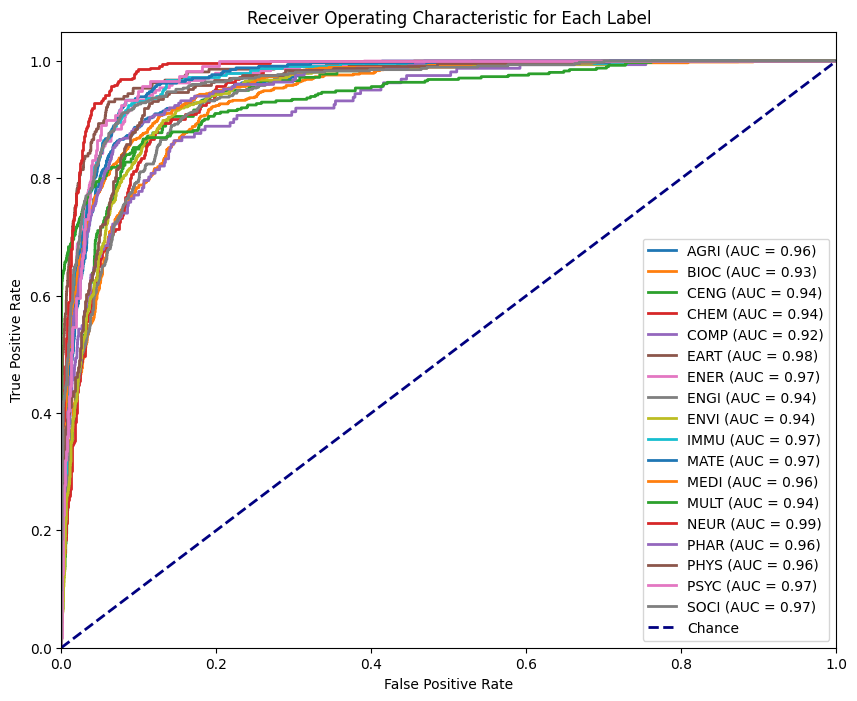

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


In [ ]:
test_score = scibert_model.evaluate([test_encodings.input_ids,  test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

126/126 [==============================] - 86s 679ms/step - loss: 0.1453 - accuracy: 0.5614
Test loss: 0.1452793926000595
Test accuracy: 0.561377227306366


In [ ]:
test_predictions = scibert_model.predict([test_encodings.input_ids,  test_encodings.attention_mask])

126/126 [==============================] - 83s 658ms/step


126/126 [==============================] - 85s 671ms/step
              precision    recall  f1-score   support

        AGRI       0.64      0.75      0.69       411
        BIOC       0.73      0.64      0.69       684
        CENG       0.73      0.16      0.26       189
        CHEM       0.78      0.16      0.27       244
        COMP       0.74      0.41      0.53       170
        EART       0.49      0.86      0.63       229
        ENER       0.64      0.70      0.67       244
        ENGI       0.58      0.65      0.61       429
        ENVI       0.64      0.63      0.64       542
        IMMU       0.70      0.48      0.57       216
        MATE       0.75      0.68      0.72       355
        MEDI       0.80      0.71      0.75       801
        MULT       0.90      0.67      0.77       427
        NEUR       0.79      0.82      0.81       331
        PHAR       0.71      0.51      0.60       260
        PHYS       0.61      0.45      0.52       221
        PSYC       0.45

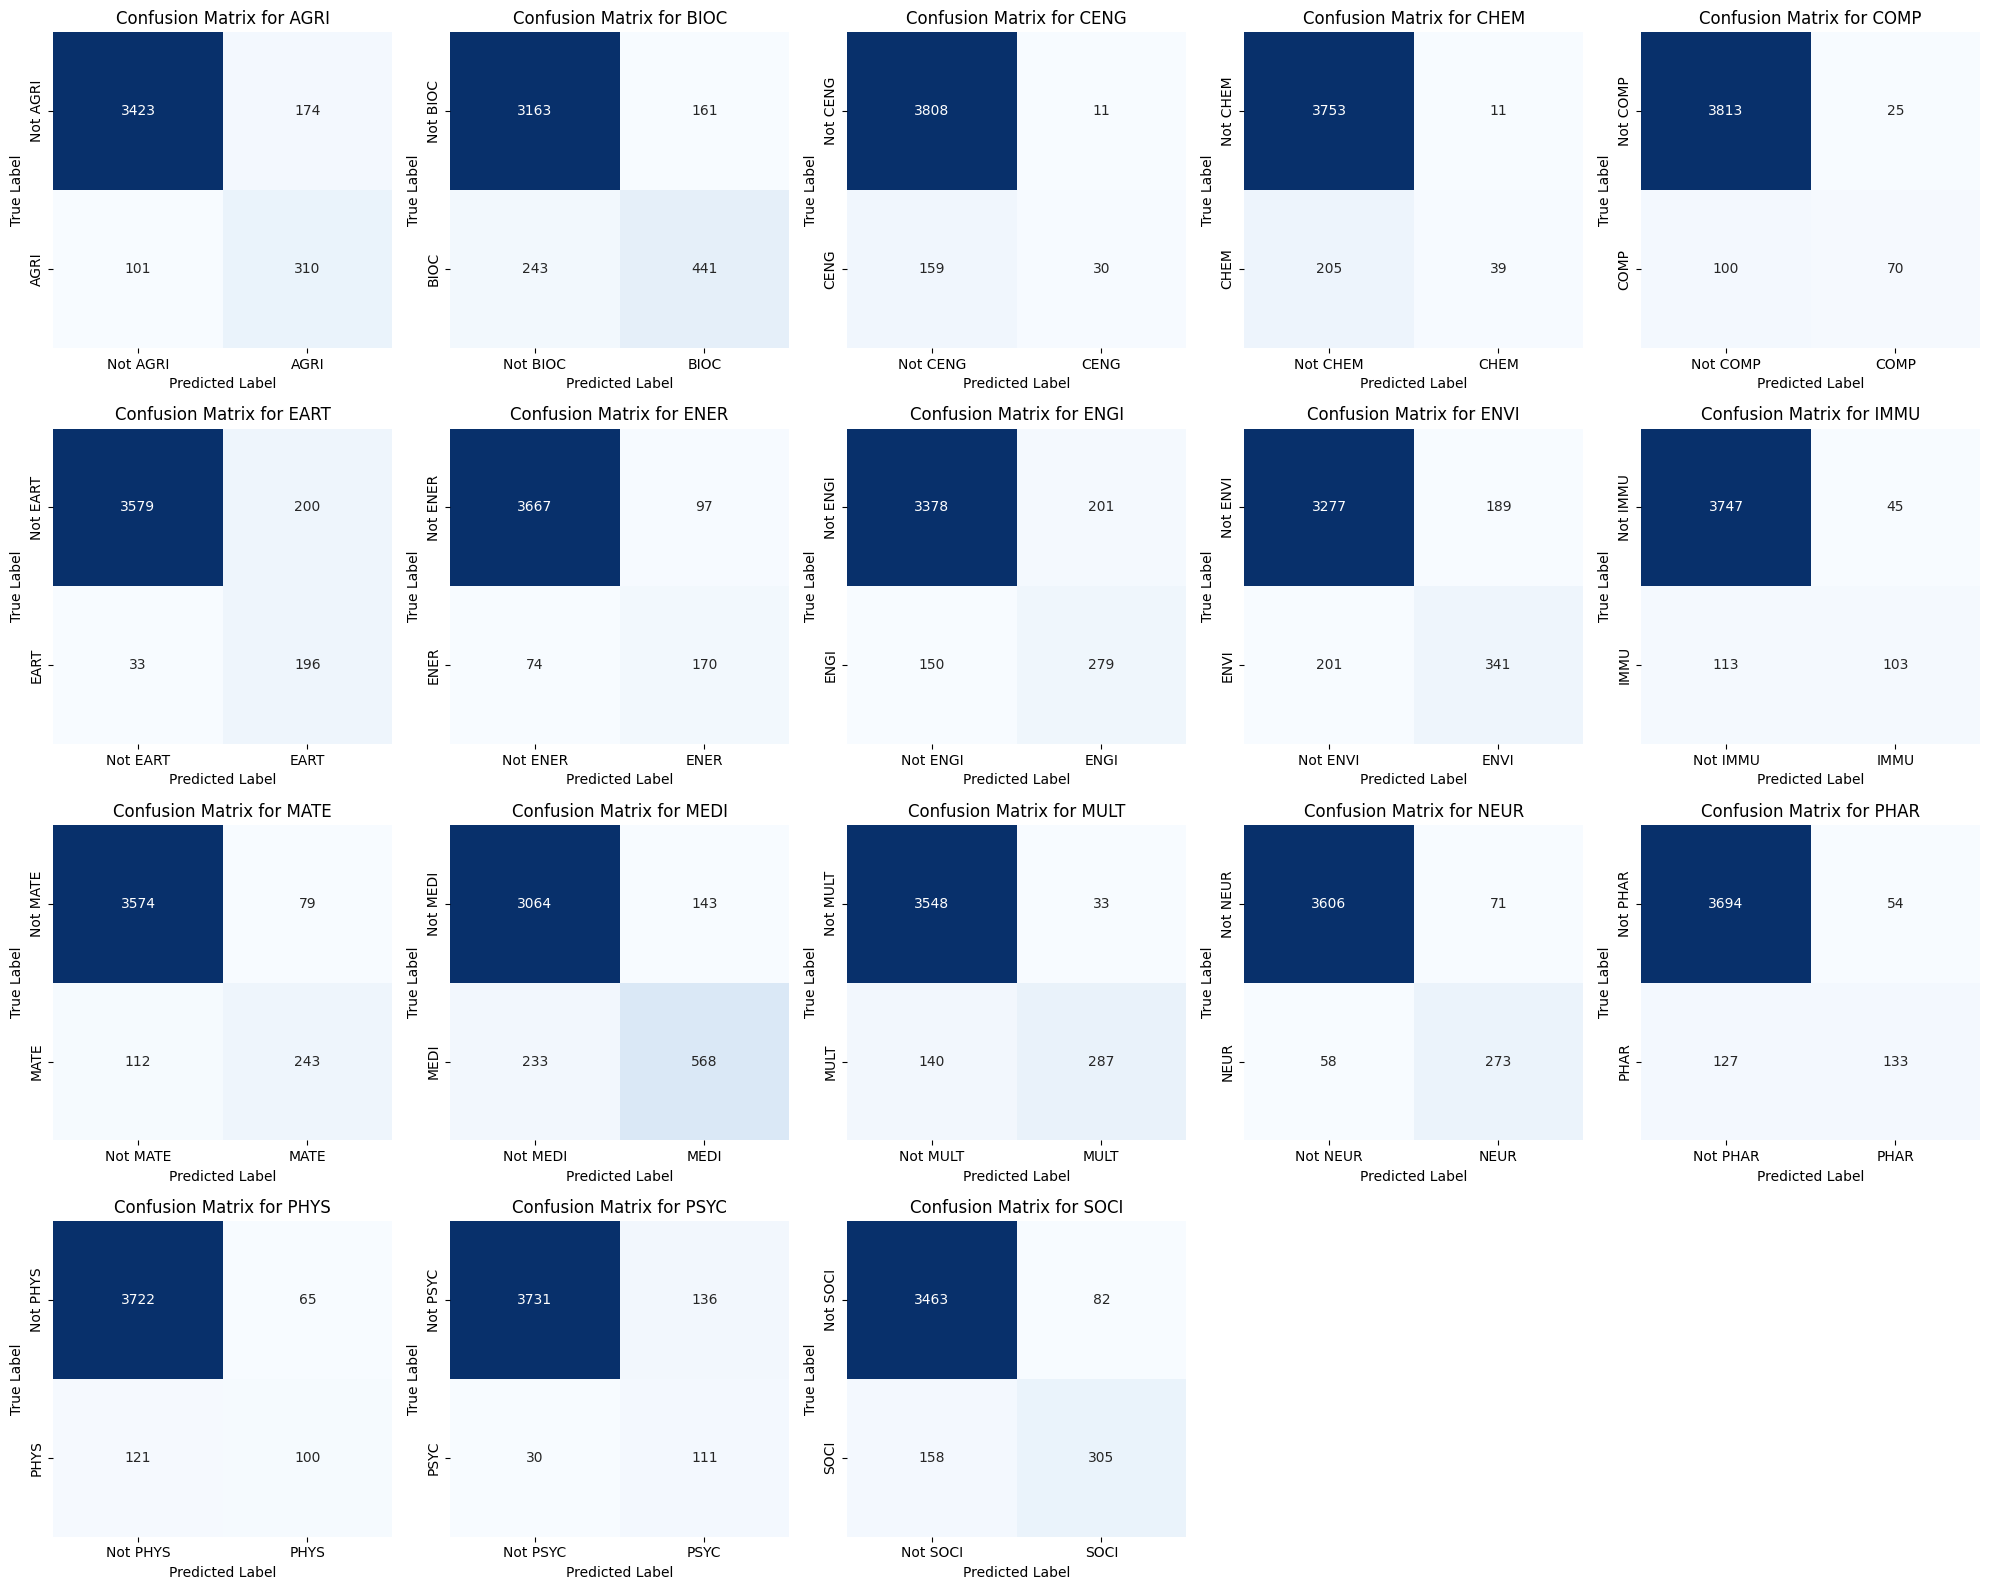

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))
    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(scibert_model,
             [test_encodings.input_ids,  test_encodings.attention_mask],
             test_labels,
             target_names)


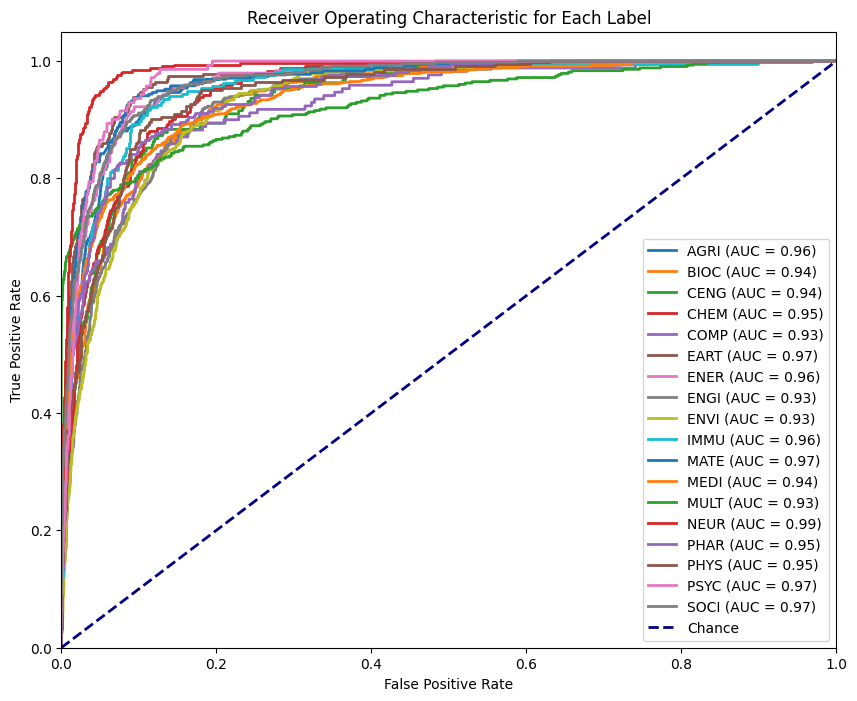

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(test_labels, test_predictions, target_names)


In [ ]:
!pip install google-auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        # Identify labels exceeding the threshold
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    # Preparing the DataFrame
    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'scibert_lam.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,We describe the design and use of a ‘polyphoni...,[SOCI],SOCI,SOCI,0.990719
1,Hospitals worldwide are facing an increasing i...,"[IMMU, MEDI]","BIOC, IMMU, MEDI",MEDI,0.665060
2,Flat oyster (Ostrea edulis L.) beds were once ...,"[AGRI, EART]","AGRI, EART",EART,0.969426
3,A methodology for wound state sensing in terms...,[MEDI],MEDI,MEDI,0.994186
4,Imaging flow cytometry (IFC) captures multicha...,"[BIOC, CENG]","BIOC, MEDI",BIOC,0.913569
...,...,...,...,...,...
4003,We designed a microfluidic chip for use with a...,"[BIOC, COMP, ENGI, MATE]","ENGI, MATE",ENGI,0.923087
4004,We explore possible candidates for metallic el...,"[CHEM, ENGI, MATE]","MATE, PHYS",MATE,0.961955
4005,The Keap1-Nrf2-ARE pathway regulates the const...,"[BIOC, CHEM]",PHAR,PHAR,0.617461
4006,Seasonal influenza virus infections cause sign...,[MEDI],MEDI,MEDI,0.781251
